# A2C Agent 

In [24]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
a2c_env = "CartPole-v1"
env = gym.make(a2c_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.95
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 300
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 32.0
Episode 1: 16.0
Episode 2: 12.0
Episode 3: 14.0
Episode 4: 20.0
Episode 5: 18.0
Episode 6: 18.0
Episode 7: 29.0
Episode 8: 17.0
Episode 9: 18.0
Episode 10: 39.0
Episode 11: 30.0
Episode 12: 66.0
Episode 13: 11.0
Episode 14: 131.0
Episode 15: 27.0
Episode 16: 16.0
Episode 17: 12.0
Episode 18: 28.0
Episode 19: 67.0
Episode 20: 47.0
Episode 21: 51.0
Episode 22: 42.0
Episode 23: 35.0
Episode 24: 66.0
Episode 25: 38.0
Episode 26: 55.0
Episode 27: 76.0
Episode 28: 43.0
Episode 29: 42.0
Episode 30: 20.0
Episode 31: 29.0
Episode 32: 37.0
Episode 33: 49.0
Episode 34: 25.0
Episode 35: 69.0
Episode 36: 45.0
Episode 37: 34.0
Episode 38: 64.0
Episode 39: 85.0
Episode 40: 41.0
Episode 41: 39.0
Episode 42: 124.0
Episode 43: 48.0
Episode 44: 22.0
Episode 45: 66.0
Episode 46: 72.0
Episode 47: 46.0
Episode 48: 26.0
Episode 49: 149.0
Episode 50: 18.0
Episode 51: 53.0
Episode 52: 85.0
Episode 53: 51.0
Episode 54: 91.0
Episode 55: 108.0
Episode 56: 118.0
Episode 57: 56.0
Episode 58: 72.0
Ep

# DR TRPO Agent (KL) 

In [35]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time

# Create Gym environment
kl_env = "CartPole-v1"
env = gym.make(kl_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.95
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 300
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    beta = np.random.choice([0.8])
    policy_loss = agent.compute_policy_loss_kl(state, state_adv, beta)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_kl_rewards = episode_rewards
dr_trpo_kl_runtime = run_time

Episode 0: 33.0
Episode 1: 32.0
Episode 2: 45.5
Episode 3: 69.0
Episode 4: 53.0
Episode 5: 62.5
Episode 6: 31.0
Episode 7: 46.5
Episode 8: 44.0
Episode 9: 34.0
Episode 10: 75.5
Episode 11: 23.5
Episode 12: 41.0
Episode 13: 46.5
Episode 14: 46.5
Episode 15: 52.5
Episode 16: 37.0
Episode 17: 86.0
Episode 18: 46.0
Episode 19: 43.0
Episode 20: 48.0
Episode 21: 44.5
Episode 22: 50.5
Episode 23: 77.0
Episode 24: 55.5
Episode 25: 42.5
Episode 26: 63.5
Episode 27: 55.5
Episode 28: 45.0
Episode 29: 86.5
Episode 30: 74.0
Episode 31: 53.5
Episode 32: 58.5
Episode 33: 43.5
Episode 34: 59.5
Episode 35: 65.0
Episode 36: 61.0
Episode 37: 61.0
Episode 38: 53.5
Episode 39: 61.5
Episode 40: 65.0
Episode 41: 91.5
Episode 42: 100.0
Episode 43: 121.5
Episode 44: 60.0
Episode 45: 80.0
Episode 46: 61.0
Episode 47: 54.0
Episode 48: 68.0
Episode 49: 74.0
Episode 50: 87.5
Episode 51: 127.5
Episode 52: 98.5
Episode 53: 131.0
Episode 54: 153.0
Episode 55: 226.0
Episode 56: 411.5
Episode 57: 366.0
Episode 58: 296.

# DR TRPO Agent (Wasserstein)

In [22]:
import gym
from a2c_dr_trpo import DRTRPOAgent 
import time
import numpy as np

wass_env = "CartPole-v1"
# Create Gym environment
env = gym.make(wass_env)

# Check agent class for initialization parameters and initialize agent
gamma = 0.95
lr = 1e-2

agent = DRTRPOAgent(env, gamma, lr)

############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 300
max_steps = 500
total_adv_diff = 0

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_mc(trajectory)
        state_adv.append(adv[0])
        total_value_loss += value_loss
    
    total_adv_diff += abs(state_adv[1] - state_adv[0])
    beta = total_adv_diff/episode
    policy_loss = agent.compute_policy_loss_wass(state, state_adv, beta)

    
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    avg_episode_reward = episode_reward/env.action_space.n
    episode_rewards.append(avg_episode_reward)
    print("Episode " + str(episode) + ": " + str(avg_episode_reward))

dr_trpo_wass_rewards = episode_rewards
dr_trpo_wass_runtime = run_time

Episode 0: 11.5
Episode 1: 17.0
Episode 2: 21.5
Episode 3: 14.0
Episode 4: 24.0
Episode 5: 22.5
Episode 6: 34.5
Episode 7: 52.0
Episode 8: 91.0
Episode 9: 83.5
Episode 10: 57.0
Episode 11: 45.0
Episode 12: 47.0
Episode 13: 47.0
Episode 14: 37.0
Episode 15: 47.5
Episode 16: 61.0
Episode 17: 105.5
Episode 18: 68.0
Episode 19: 73.5
Episode 20: 103.5
Episode 21: 122.0
Episode 22: 101.0
Episode 23: 119.0
Episode 24: 102.5
Episode 25: 67.5
Episode 26: 125.0
Episode 27: 101.0
Episode 28: 92.5
Episode 29: 85.5
Episode 30: 93.0
Episode 31: 64.0
Episode 32: 102.0
Episode 33: 84.0
Episode 34: 59.0
Episode 35: 94.5
Episode 36: 79.5
Episode 37: 78.0
Episode 38: 76.5
Episode 39: 142.5
Episode 40: 82.5
Episode 41: 78.5
Episode 42: 85.0
Episode 43: 107.0
Episode 44: 133.5
Episode 45: 101.5
Episode 46: 71.0
Episode 47: 94.0
Episode 48: 103.5
Episode 49: 90.5
Episode 50: 126.5
Episode 51: 128.5
Episode 52: 105.5
Episode 53: 119.5
Episode 54: 97.5
Episode 55: 124.0
Episode 56: 107.5
Episode 57: 79.0
Epis

# Graph

In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np

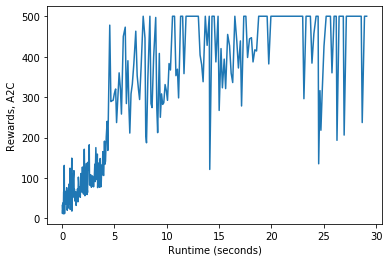

In [25]:
plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/a2c/' + a2c_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((a2c_runtime, a2c_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

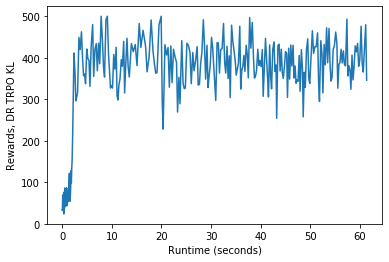

In [36]:
plt.plot(dr_trpo_kl_runtime, dr_trpo_kl_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_kl/' + kl_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_kl_runtime, dr_trpo_kl_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')

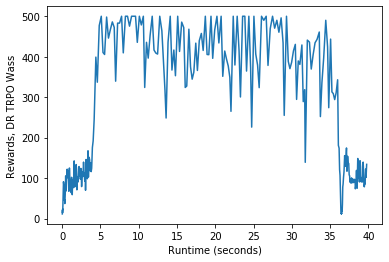

In [23]:
plt.plot(dr_trpo_wass_runtime, dr_trpo_wass_rewards)
plt.ylabel('Rewards, DR TRPO Wass')
plt.xlabel('Runtime (seconds)')
plt.show()

name = './log_files/dr_trpo_wass/' + wass_env + '-' + str(time.time()) + '.csv' 
out = np.column_stack((dr_trpo_wass_runtime, dr_trpo_wass_rewards))
with open(name, 'ab') as f:
    np.savetxt(f, out, delimiter=',')